# **Resultados Eleitorais (1996-2024)**

## **1. Business Undestanding**

**Objetivo**: Investigar o percentual de prefeitos eleitos por cada partido desde 1996 até 2024.

## **2. Data Undestanding**

### **Coleta dos Dados**

#### Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import basedosdados as bd
import seaborn as sns
import matplotlib.pyplot as plot

#### Importação

In [3]:
query = '''
SELECT * FROM `basedosdados.br_tse_eleicoes.resultados_candidato_municipio` 
WHERE cargo = 'prefeito' OR cargo = 'governador'
'''

df = bd.read_sql(
    query = query,
    billing_project_id="resultado-eleicoes-br"
)

Downloading: 100%|██████████|


### **Descrição dos Dados**

#### Colunas

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443830 entries, 0 to 443829
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   ano                         443830 non-null  Int64 
 1   turno                       443830 non-null  Int64 
 2   id_eleicao                  443830 non-null  object
 3   tipo_eleicao                443830 non-null  object
 4   data_eleicao                443830 non-null  dbdate
 5   sigla_uf                    443830 non-null  object
 6   id_municipio                443824 non-null  object
 7   id_municipio_tse            443830 non-null  object
 8   cargo                       443830 non-null  object
 9   numero_partido              443830 non-null  object
 10  sigla_partido               443830 non-null  object
 11  titulo_eleitoral_candidato  436428 non-null  object
 12  sequencial_candidato        443829 non-null  object
 13  numero_candidato            4

#### Variáveis Contínuas

In [5]:
df.describe()

,ano,turno,votos
count,443830.0,443830.0,443830.0
mean,2010.095843,1.088825,4122.084875
std,8.767365,0.284491,35920.08178
min,1994.0,1.0,0.0
25%,2002.0,1.0,12.0
50%,2010.0,1.0,562.0
75%,2018.0,1.0,2497.0
max,2024.0,2.0,3885416.0


#### Variáveis Categóricas

In [6]:
df.describe(include='object')

,id_eleicao,tipo_eleicao,sigla_uf,id_municipio,id_municipio_tse,cargo,numero_partido,sigla_partido,titulo_eleitoral_candidato,sequencial_candidato,numero_candidato,resultado
count,443830,443830,443830,443824,443830,443830,443830,443830,436428,443829,443830,443814
unique,484,446,27,5570,5572,2,40,56,69460,77848,55,5
top,546,eleicao ordinaria,SP,3550308,71072,governador,15,PT,000087950655,10000,15,nao eleito
freq,48173,440352,71301,204,204,331979,52159,46006,2794,2539,47970,322479


### **Análise Exploratória dos Dados**

#### ID de São Paulo (SP)

Vamos tentar encontrar o id do município de São Paulo (SP) por meio do resultado eleitoral de 2024. Sabemos que tivemos um segundo turno entre Ricardo Nunes (MDB) e Guilherme Boulos (PSOL). Com alguns filtros, podemos encontrar os resultados dessa disputa.

In [7]:
df[
    (df['ano'] == 2024) & 
    (df['cargo'] == 'prefeito') &
    (df['sigla_uf'] == 'SP') &
    ((df['numero_candidato'] == "15") | (df['numero_candidato'] == "50")) &
    (df['turno'] == 2) &
    (df['votos'] > 1000000)
].sort_values(by='id_municipio')

,ano,turno,id_eleicao,tipo_eleicao,data_eleicao,sigla_uf,id_municipio,id_municipio_tse,cargo,numero_partido,sigla_partido,titulo_eleitoral_candidato,sequencial_candidato,numero_candidato,resultado,votos
433682,2024,2,620,eleicao ordinaria,2024-10-27,SP,3550308,71072,prefeito,15,MDB,113912050167,250002098117,15,eleito,3393110
440023,2024,2,620,eleicao ordinaria,2024-10-27,SP,3550308,71072,prefeito,50,PSOL,195710880167,250001926547,50,nao eleito,2323901


*Voilà*! O id (IBGE) do município de São Paulo (SP) é "3550308". Vamos salvá-lo em uma variável.

In [8]:
id_muni_sp = "3550308"

Vamos, agora, analisar os resultados para as eleições de 2024 em São Paulo (SP).

In [9]:
muni_sp_2024 = df[
    (df['id_municipio'] == id_muni_sp) & (df['ano'] == 2024)
].sort_values(by='turno')

muni_sp_2024

,ano,turno,id_eleicao,tipo_eleicao,data_eleicao,sigla_uf,id_municipio,id_municipio_tse,cargo,numero_partido,sigla_partido,titulo_eleitoral_candidato,sequencial_candidato,numero_candidato,resultado,votos
433681,2024,1,619,eleicao ordinaria,2024-10-06,SP,3550308,71072,prefeito,15,MDB,113912050167,250002098117,15,2º turno,1801139
433832,2024,1,619,eleicao ordinaria,2024-10-06,SP,3550308,71072,prefeito,16,PSTU,227870560159,250002078851,16,nao eleito,3017
436404,2024,1,619,eleicao ordinaria,2024-10-06,SP,3550308,71072,prefeito,27,DC,095285460167,250002355541,27,nao eleito,833
436463,2024,1,619,eleicao ordinaria,2024-10-06,SP,3550308,71072,prefeito,28,PRTB,049143831023,250001978066,28,nao eleito,1719274
436703,2024,1,619,eleicao ordinaria,2024-10-06,SP,3550308,71072,prefeito,30,NOVO,014749662011,250001884312,30,nao eleito,84212
436508,2024,1,619,eleicao ordinaria,2024-10-06,SP,3550308,71072,prefeito,29,PCO,430484530141,250002362195,29,nao eleito,960
437750,2024,1,619,eleicao ordinaria,2024-10-06,SP,3550308,71072,prefeito,40,PSB,392700900159,250002163891,40,nao eleito,605552
439819,2024,1,619,eleicao ordinaria,2024-10-06,SP,3550308,71072,prefeito,45,PSDB,126230350183,250002180213,45,nao eleito,112344
442514,2024,1,619,eleicao ordinaria,2024-10-06,SP,3550308,71072,prefeito,80,UP,338181630167,250002031025,80,nao eleito,5593
440022,2024,1,619,eleicao ordinaria,2024-10-06,SP,3550308,71072,prefeito,50,PSOL,195710880167,250001926547,50,2º turno,1776127


Vamos ver o resultado eleitoral por partido.

In [10]:
muni_sp_2024.\
    groupby(['sigla_partido', 'resultado']).\
    size().\
    reset_index(name='total')

,sigla_partido,resultado,total
0,DC,nao eleito,1
1,MDB,2º turno,1
2,MDB,eleito,1
3,NOVO,nao eleito,1
4,PCO,nao eleito,1
5,PRTB,nao eleito,1
6,PSB,nao eleito,1
7,PSDB,nao eleito,1
8,PSOL,2º turno,1
9,PSOL,nao eleito,1


Os resultados acima mostram um possível problema para a nossa análise. Em cidades onde houve 2º turno, o mesmo partido se repete duas vezes: uma para o resultado do primeiro turno e outra para o resultado do segundo turno. Nosso propósito é ver o percentual de eleitos e não eleito por partido, então se tiver tido 2T, precisamos retirar as linhas dos dois candidatos cujo resultado é "2º Turno".

In [11]:
muni_sp_2024 = muni_sp_2024[
    muni_sp_2024['resultado'] != '2º turno'
    ]

muni_sp_2024.\
    groupby(['sigla_partido', 'resultado']).\
    size().\
    reset_index(name='total')

,sigla_partido,resultado,total
0,DC,nao eleito,1
1,MDB,eleito,1
2,NOVO,nao eleito,1
3,PCO,nao eleito,1
4,PRTB,nao eleito,1
5,PSB,nao eleito,1
6,PSDB,nao eleito,1
7,PSOL,nao eleito,1
8,PSTU,nao eleito,1
9,UP,nao eleito,1


#### Estado de São Paulo (2024)

Agora, sim! Vamos ver o percentual de eleitos e não eleitos no Estado de São Paulo.

In [12]:
# Filtra somente as eleições de 2024 em SP e retira os resultados de 2º turno para não
# poluir o percentual de eleitos x não eleitos
est_sp_2024 = df[
    (df['ano'] == 2024) & 
    (df['sigla_uf'] == 'SP') &
    (df['resultado'] != '2º turno')
]

# Agrupa o df por partido e cria uma coluna com o total de candidatos eleitos e não eleitos
est_sp_2024 = est_sp_2024.\
    groupby(['sigla_partido', 'resultado']).\
    size().\
    reset_index(name='total')

# Cria coluna com o total de candidatos por partido
est_sp_2024['total_partido'] =est_sp_2024.\
    groupby('sigla_partido')['total'].\
    transform('sum')

# Cria coluna de percentual
est_sp_2024['percentual'] = (est_sp_2024['total']  / est_sp_2024['total_partido']) * 100

# Visualiza
est_sp_2024[est_sp_2024['resultado'] == 'eleito'].sort_values(by=['percentual'], ascending=False)

,sigla_partido,resultado,total,total_partido,percentual
29,PSD,eleito,206,396,52.020202
39,REPUBLICANOS,eleito,82,205,40.000000
6,MDB,eleito,67,174,38.505747
22,PP,eleito,47,124,37.903226
17,PL,eleito,104,287,36.236934
3,CIDADANIA,eleito,5,15,33.333333
31,PSDB,eleito,21,65,32.307692
20,PODE,eleito,31,109,28.440367
43,UNIÃO,eleito,34,124,27.419355
41,SOLIDARIEDADE,eleito,4,32,12.500000


In [13]:
maiores_perc = est_sp_2024[
    est_sp_2024['resultado'] == 'eleito'
    ].\
    sort_values(by=['percentual'], ascending=False)

maiores_perc = maiores_perc['sigla_partido'].values
maiores_perc

array(['PSD', 'REPUBLICANOS', 'MDB', 'PP', 'PL', 'CIDADANIA', 'PSDB',
       'PODE', 'UNIÃO', 'SOLIDARIEDADE', 'AVANTE', 'PSB', 'NOVO', 'PDT',
       'PRD', 'MOBILIZA', 'PT'], dtype=object)

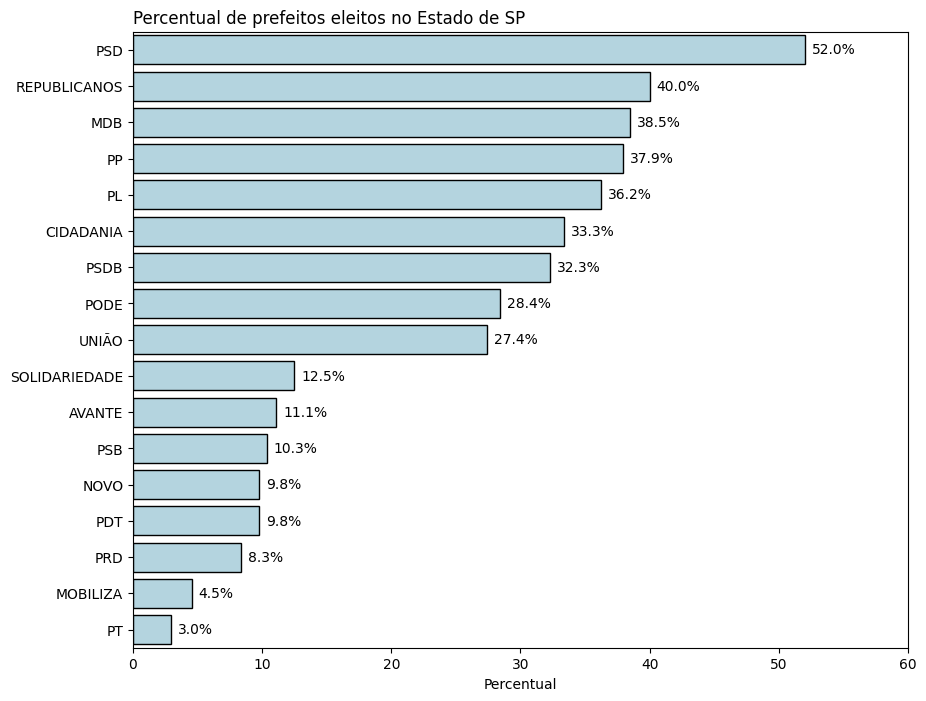

In [14]:
plot.figure(figsize=(10, 8))

ax = sns.barplot(
    data=est_sp_2024[est_sp_2024['resultado'] == 'eleito'],
    y='sigla_partido',
    x='percentual',
    order=maiores_perc,
    edgecolor='black',
    color='lightblue'
)

plot.title('Percentual de prefeitos eleitos no Estado de SP', loc='left')
plot.ylabel('')
plot.xlabel('Percentual')
plot.xlim([0,60])

for container in ax.containers:
    ax.bar_label(
        container=container,
        labels=[f'{val:.1f}%' for val in container.datavalues],
        padding=5 # Ajusta o espaço entre o rótulo e a barra
    )

#### Brasil (2024)

Agora vamos visualizar o percentual de prefeitos eleitos em 2024 por partido no Brasil inteiro!

In [15]:
brasil_2024 = df[
    (df['ano'] == 2024) & (df['resultado'] != '2º turno')
]

brasil_2024 = brasil_2024.\
    groupby(['sigla_partido', 'resultado']).\
    size().\
    reset_index(name='total')

brasil_2024['total_partido'] = brasil_2024.\
    groupby('sigla_partido')['total'].\
    transform('sum')

brasil_2024['percentual'] = (brasil_2024['total'] / brasil_2024['total_partido']) * 100

brasil_2024 = brasil_2024[brasil_2024['resultado'] == 'eleito']

# Visualiza
brasil_2024.sort_values(by='percentual', ascending=False)


,sigla_partido,resultado,total,total_partido,percentual
34,PSD,eleito,884,1707,51.786760
26,PP,eleito,747,1486,50.269179
50,UNIÃO,eleito,583,1250,46.640000
8,MDB,eleito,855,1874,45.624333
46,REPUBLICANOS,eleito,432,1079,40.037071
32,PSB,eleito,309,776,39.819588
36,PSDB,eleito,274,702,39.031339
2,AVANTE,eleito,136,373,36.461126
20,PL,eleito,514,1465,35.085324
14,PC do B,eleito,19,55,34.545455


A tabela acima mostra o percentual de prefeitos eleitos por partido para o ano de 2024.PSD, PP e União Brasil foram os partidos com as maiores taxas de aproveitamento.

#### Brasil (1996-2024)

Vamos ver agora o percentual de aproveitamento de cada partido ao longo de toda a série histórica disponível.

In [16]:
brasil_pref = df[
    (df['cargo'] == 'prefeito') &
    (df['resultado'] != '2º turno')
    ]

brasil_pref = brasil_pref.\
    groupby(['sigla_partido', 'resultado', 'ano']).size().reset_index(name='total')

brasil_pref['total_partido'] = brasil_pref.\
    groupby(['sigla_partido', 'ano'])['total'].transform('sum')

brasil_pref['percentual'] = (brasil_pref['total'] / brasil_pref['total_partido']) * 100

brasil_pref = brasil_pref[brasil_pref['resultado'] == 'eleito']


In [17]:
brasil_pref.sort_values(by='percentual', ascending=False).head(20)

,sigla_partido,resultado,ano,total,total_partido,percentual
98,PFL,eleito,1996,35,59,59.322034
282,PSD,eleito,2024,884,1707,51.786760
171,PP,eleito,2024,747,1486,50.269179
170,PP,eleito,2020,705,1467,48.057260
294,PSDB,eleito,2016,815,1704,47.828638
290,PSDB,eleito,2000,990,2078,47.641963
139,PMDB,eleito,2008,1232,2615,47.112811
167,PP,eleito,2008,563,1203,46.799667
446,UNIÃO,eleito,2024,583,1250,46.640000
28,MDB,eleito,2016,1074,2312,46.453287


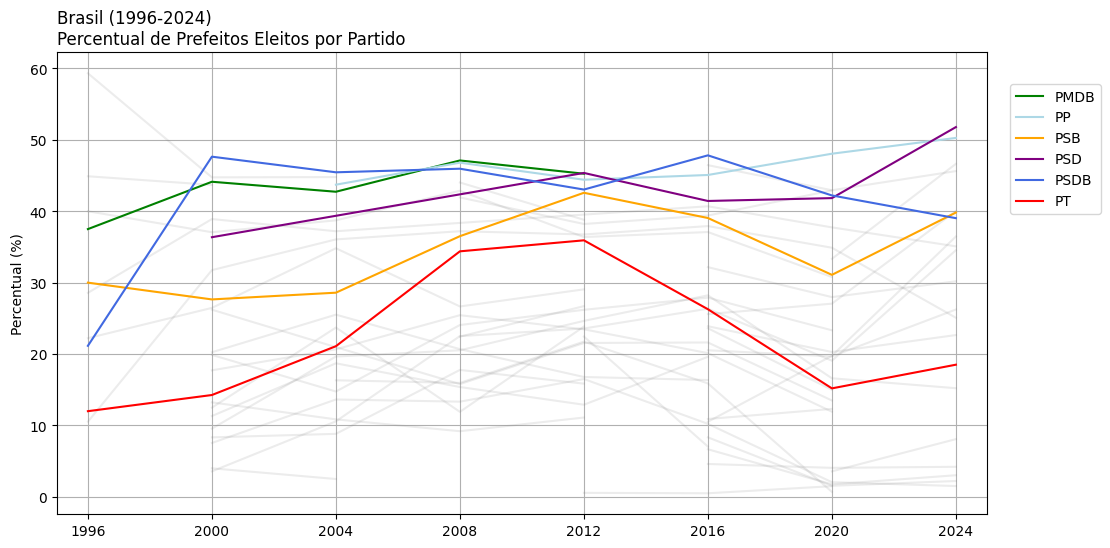

In [18]:
plot.figure(figsize=(12,6))

partidos = ['PT', 'PSB', 'PSD', 'PSDB', 'PP', 'PMDB']

# Demais partidos
sns.lineplot(
    data = brasil_pref[~brasil_pref['sigla_partido'].isin(partidos)],
    x = 'ano',
    y = 'percentual',
    hue = 'sigla_partido',
    legend=False,
    palette=['gray'],
    alpha=0.15
)

paleta = sns.color_palette(
    palette=['green', 'lightblue', 'orange', 'purple', 'royalblue', 'red']
    )

sns.lineplot(
    data = brasil_pref[brasil_pref['sigla_partido'].isin(partidos)],
    x = 'ano',
    y = 'percentual',
    hue = 'sigla_partido',
    palette=paleta
)

plot.title(
    'Brasil (1996-2024)\nPercentual de Prefeitos Eleitos por Partido',
    loc='left'
    )

plot.ylabel('Percentual (%)')
plot.xticks(ticks=range(1996, 2025, 4))
plot.xlim((1995, 2025))
plot.xlabel('')
plot.legend(loc=(1.025, 0.65))
plot.grid(True)